In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

: 

1ère Etape : Lire le dataset et nettoyer les données

In [11]:
df = pd.read_csv('dataset/GlobalTemperaturesByCity.csv')

# Clean the dataset
df = df.dropna()

2ème Etape : Afficher la température moyenne des USA de 2000 à 2020

Text(0.5, 1.0, 'Température Moyenne des USA de 2000 à 2020')

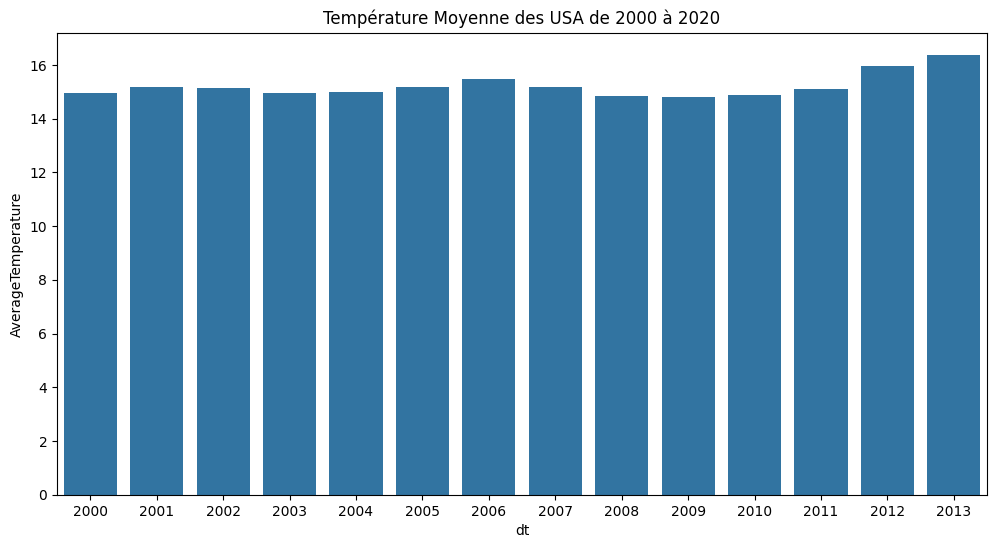

In [12]:
# Create a new dataframe with the mean of temperatures for each year in the United States
df['dt'] = pd.to_datetime(df['dt'], errors='coerce')
targetedTime = df[(df['Country'] == 'United States') & (df['dt'].dt.year >= 2000)]
df_summer_grouped = targetedTime.groupby(targetedTime["dt"].dt.year)["AverageTemperature"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='dt', y='AverageTemperature', data=df_summer_grouped)
plt.title("Température Moyenne des USA de 2000 à 2020")



3ème Etape : Afficher la température moyenne des USA de 2000 à 2013 et prédire les températures moyennes de 2014 à 2020 avec une régression linéaire

In [13]:
X = df_summer_grouped["dt"].values.reshape(-1, 1)
y = df_summer_grouped["AverageTemperature"].values

model = LinearRegression()
model.fit(X, y)

future_years = np.arange(df_summer_grouped['dt'].max() + 1, 2021).reshape(-1, 1)
predictions = model.predict(future_years)
df_summer_grouped["Type"] = "Real"

df_predictions = pd.DataFrame({'dt': future_years.flatten(), 'AverageTemperature': predictions, 'Type': 'Prediction'})
df_combined = pd.concat([df_summer_grouped, df_predictions])


Afficher la régression linéaire et les prédictions

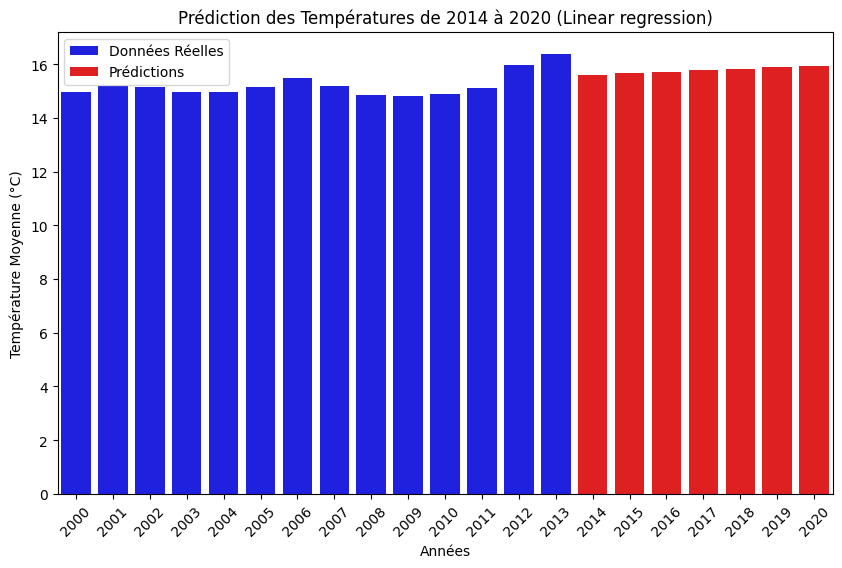

In [14]:
plt.figure(figsize=(10,6))
sns.regplot(x=X.flatten(), y=y, scatter=True, ci=95, line_kws={"color": "red"})

sns.barplot(
    x=df_summer_grouped["dt"],
    y=df_summer_grouped["AverageTemperature"],
    color="blue",
    label="Données Réelles"
)

sns.barplot(
    x=df_predictions["dt"],
    y=df_predictions["AverageTemperature"],
    color="red",
    label="Prédictions"
)

plt.xlabel("Années")
plt.ylabel("Température Moyenne (°C)")
plt.title("Prédiction des Températures de 2014 à 2020 (Linear regression)")
plt.legend()
plt.xticks(rotation=45)
plt.show()

Calcul des indicateurs de performance sur le model Linear Regression

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X)

mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f"🔹 MAE (Regression linéaire): {mae:.2f}")
print(f"🔹 RMSE (Regression linéaire): {rmse:.2f}")
print(f"🔹 R² (Regression linéaire): {r2:.4f}")

🔹 MAE (Regression linéaire): 0.30
🔹 RMSE (Regression linéaire): 0.38
🔹 R² (Regression linéaire): 0.2425


Calcul des indicateurs de performance sur le model Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Générer les années futures
future_years = np.arange(2001, 2025).reshape(-1, 1)

# Initialisation et entraînement du modèle Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Prédictions sur les données existantes
random_forest_pred = rf_model.predict(X)

# Prédictions sur les années futures
random_forest_future_pred = rf_model.predict(future_years)

# Calcul des métriques sur les données existantes
mae_rf = mean_absolute_error(y, random_forest_pred)
rmse_rf = np.sqrt(mean_squared_error(y, random_forest_pred))
r2_rf = r2_score(y, random_forest_pred)

# Création du DataFrame des prédictions futures
random_forest_dataset = pd.DataFrame({
    "dt": future_years.flatten(),
    "AverageTemperature": random_forest_future_pred,
    # "type": "Prediction (Random Forest)"
})

# Fusion avec les vraies données historiques
final_rf_dataset = pd.concat([df_combined, random_forest_dataset])
final_rf_dataset = final_rf_dataset.rename(columns={"type": "Type"})

# Affichage des résultats
print(f"🔹 MAE (Random Forest) : {mae_rf:.2f}")
print(f"🔹 RMSE (Random Forest) : {rmse_rf:.2f}")
print(f"🔹 R² (Random Forest) : {r2_rf:.4f}")


🔹 MAE (Random Forest) : 0.07
🔹 RMSE (Random Forest) : 0.09
🔹 R² (Random Forest) : 0.9520


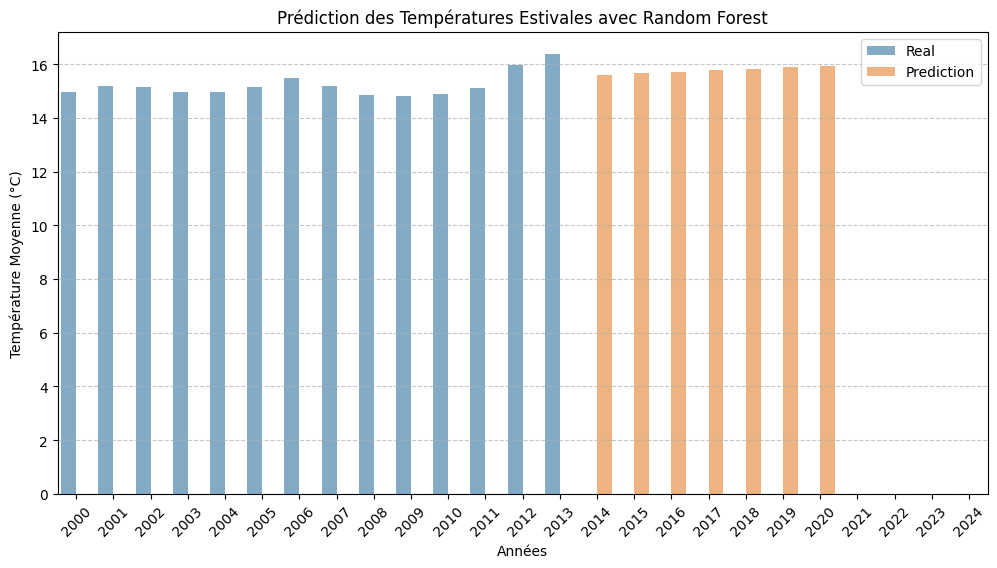

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Trier les données par année
final_rf_dataset = final_rf_dataset.sort_values("dt")

# Affichage des barres pour les données réelles et les prédictions
plt.figure(figsize=(12, 6))

sns.barplot(
    data=final_rf_dataset,
    x="dt",
    y="AverageTemperature",
    hue="Type",
    alpha=0.6  # Transparence pour mieux voir les différences
)

# Ajout de la courbe de tendance pour les données réelles
# sns.lineplot(
#     data=final_rf_dataset[final_rf_dataset["Type"] == "Real"],
#     x="dt",
#     y="AverageTemperature",
#     color="blue",
#     linewidth=2,
#     linestyle="solid",
#     label="Tendance Réelle"
# )

# Ajout de la courbe de tendance Random Forest
# sns.lineplot(
#     data=final_rf_dataset[final_rf_dataset["Type"] == "Prediction (Random Forest)"],
#     x="dt",
#     y="AverageTemperature",
#     color="black",
#     linewidth=2,
#     linestyle="dashed",
#     label="Tendance (Random Forest)"
# )

# Ajustements du graphique
plt.xlabel("Années")
plt.ylabel("Température Moyenne (°C)")
plt.title("Prédiction des Températures Estivales avec Random Forest")
plt.legend()
plt.xticks(rotation=45)  # Rotation des labels d'années
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()